In [31]:
import pandas as pd

DATASET_FILENAME = 'training.1600000.processed.noemoticon.csv'

tweet_df = pd.read_csv(DATASET_FILENAME, header=None, encoding='latin')
tweet_df.head()

,0,1,2,3,4,5
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [32]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   0       1600000 non-null  int64 
 1   1       1600000 non-null  int64 
 2   2       1600000 non-null  object
 3   3       1600000 non-null  object
 4   4       1600000 non-null  object
 5   5       1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [33]:
tweet_df.columns = ['target', 'ids', 'date', 'flag', 'user', 'text']
tweet_df.head()

,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


- `text` feature 필요한 전처리
  - 감정 분석과 상관 없는 멘션과 링크 제거
  - 대소문자 통일
  - 의성어, 줄임말, 약어 통일

In [34]:
tweet_df.drop(['ids', 'date', 'flag', 'user'], axis=1, inplace=True)
tweet_df.head()

,target,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


In [35]:
text_length_s = tweet_df['text'].map(len)
print('min:', text_length_s.min())
print('mean:', text_length_s.mean())
print('max:', text_length_s.max())

min: 6
mean: 74.09011125
max: 374


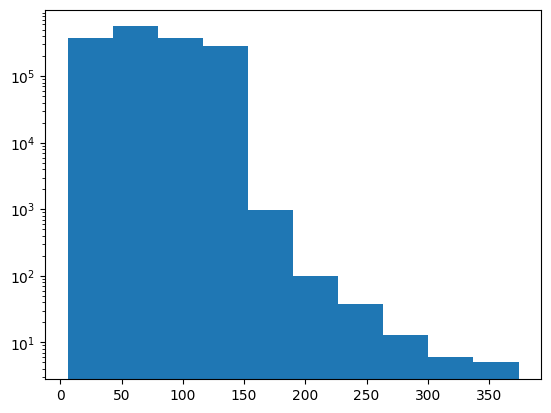

In [36]:
import matplotlib.pyplot as plt


plt.hist(text_length_s)
plt.yscale('log')
plt.show()

In [37]:
text = tweet_df['text'][0]
print(text)

@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D


In [38]:
import re

TWEETER_MENTION_REGEX = r'@[a-zA-Z0-9_]{5,15}'
HYPERLINK_REGEX = r'(https:\/\/www\.|http:\/\/www\.|https:\/\/|http:\/\/)?[a-zA-Z]{2,}(\.[a-zA-Z]{2,})(\.[a-zA-Z]{2,})?\/[a-zA-Z0-9]{2,}|((https:\/\/www\.|http:\/\/www\.|https:\/\/|http:\/\/)?[a-zA-Z]{2,}(\.[a-zA-Z]{2,})(\.[a-zA-Z]{2,})?)|(https:\/\/www\.|http:\/\/www\.|https:\/\/|http:\/\/)?[a-zA-Z0-9]{2,}\.[a-zA-Z0-9]{2,}\.[a-zA-Z0-9]{2,}(\.[a-zA-Z0-9]{2,})?'


def preprocess(text: str) -> str:
    # change all uppercase to lowercase
    text = text.lower()
    # remove @mention
    text = re.sub(TWEETER_MENTION_REGEX, '', text)
    # remove hyperlink
    text = re.sub(HYPERLINK_REGEX, '', text)
    # shorten blank
    text = re.sub(r'\w+', ' ', text)
    # trim
    text = text.strip()
    
    return text

print(preprocess(text))

- awww, that's a bummer. you shoulda got david carr of third day to do it. ;d


In [39]:
tweet_df['preprocessed'] = tweet_df['text'].map(preprocess)
tweet_df.sample(n=10)

,target,text,preprocessed
1477806,4,"@Watzlaw Haha, yeah","haha, yeah"
1310713,4,i smell pot outside it smells so yummy,i smell pot outside it smells so yummy
1525460,4,yay my ELF order shipped! My very first ELF or...,yay my elf order shipped! my very first elf or...
1530479,4,yay at the weekend i'll go to see HANNAH MONT...,yay at the weekend i'll go to see hannah monta...
529523,0,"just went through some pictures, i miss port-a...","just went through some pictures, i miss port-a..."
1450056,4,"So I'm Totally feeling Sleeperstar, BlackGold,...","so i'm totally feeling sleeperstar, blackgold,..."
1252890,4,For @thisstarchild x â« http://blip.fm/~7gfai,for x â« /~7gfai
788897,0,oh man my team is suffering. I dont wanna jump...,oh man my team is suffering. i dont wanna jump...
111928,0,"@isaimperial AHH, I'm too in love with the two...","ahh, i'm too in love with the two of them."
1394693,4,Just woke up after playing Xbox until 4am last...,just woke up after playing xbox until 4am last...


In [41]:
preprocessed_length_s = tweet_df['preprocessed'].map(len)
print('min:', preprocessed_length_s.min())
print('mean:', preprocessed_length_s.mean())
print('max:', preprocessed_length_s.max())

min: 0
mean: 65.75153875
max: 360


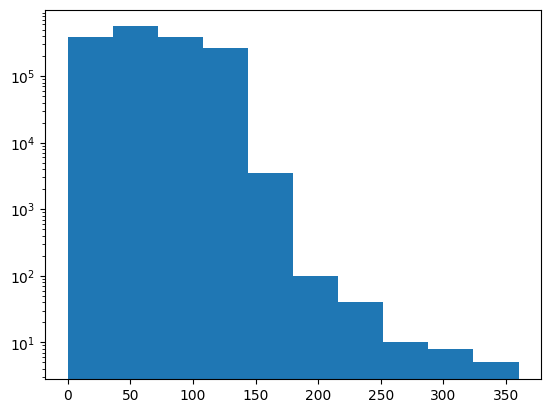

In [42]:
plt.hist(preprocessed_length_s)
plt.yscale('log')
plt.show()

In [43]:
tweet_df[preprocessed_length_s == 0]

,target,text,preprocessed
208,0,@mandayyy,
249,0,@mandayyy,
398,0,@danadearmond,
430,0,@anistorm,
1011,0,@citizensheep,
...,...,...,...
1596542,4,@SarY_ChaN,
1596670,4,@Catherine_Smith,
1597326,4,@ashtonshay00,
1599494,4,@Sworn4DaBosses,


In [44]:
tweet_df = tweet_df[preprocessed_length_s > 0]

In [45]:
tweet_df.groupby('target').count()

,text,preprocessed
target,,
0,798489,798489
4,798676,798676


In [46]:
positive_df = tweet_df[tweet_df['target'] == 4]
negative_df = tweet_df[tweet_df['target'] == 0]

print('pos:', positive_df.shape[0])
print('neg:', negative_df.shape[0])

pos: 798676
neg: 798489


In [59]:
from collections import Counter
from wordcloud import WordCloud


def get_word_frequency(df: pd.DataFrame, wc: WordCloud=WordCloud()) -> Counter:
    #word_freq = Counter()
    corpus = ''
    for text in df['preprocessed']:
        #word_freq.update(wc.process_text(text))
        corpus += text + ' '
    word_freq = Counter(wc.process_text(corpus))

    return word_freq

In [60]:
pos_freq = dict(get_word_frequency(positive_df.sample(frac=0.1)).most_common(200))
neg_freq = dict(get_word_frequency(negative_df.sample(frac=0.1)).most_common(200))

print(pos_freq)

{'love': 4555, 'quot': 4367, 'thank': 4280, 'now': 3386, 'lol': 3270, 'u': 3040, 'good': 2905, 'going': 2814, 'today': 2768, 'day': 2656, 'one': 2479, 'got': 2396, 'see': 2371, 'will': 2316, 'amp': 2301, 'know': 2299, 'time': 2257, 'go': 2132, 'work': 2018, 'haha': 2014, 'think': 1968, 'new': 1848, 'hope': 1732, 'great': 1716, 'well': 1685, 'twitter': 1664, 'back': 1630, 'fun': 1490, 'nice': 1471, 'need': 1443, 'im': 1416, 'make': 1387, 'want': 1332, 'happy': 1322, 'awesome': 1321, 'really': 1304, 'much': 1267, 'tomorrow': 1247, 'way': 1236, 'oh': 1215, 'watching': 1214, 'look': 1212, 'still': 1200, 'friend': 1183, 'come': 1173, 'hey': 1159, 'tonight': 1081, 'night': 1070, 'ye': 1063, 'yay': 1048, 'thing': 1046, 'yeah': 1037, 'people': 1011, 'say': 1008, 'lt': 979, 'guy': 949, 'tweet': 948, 'wait': 936, 'home': 932, 'amazing': 924, 'cool': 900, 'best': 892, 'sleep': 858, 'morning': 858, 'right': 855, 'show': 849, 'life': 837, 'made': 835, 'week': 825, 'ok': 822, 'good morning': 820, 's

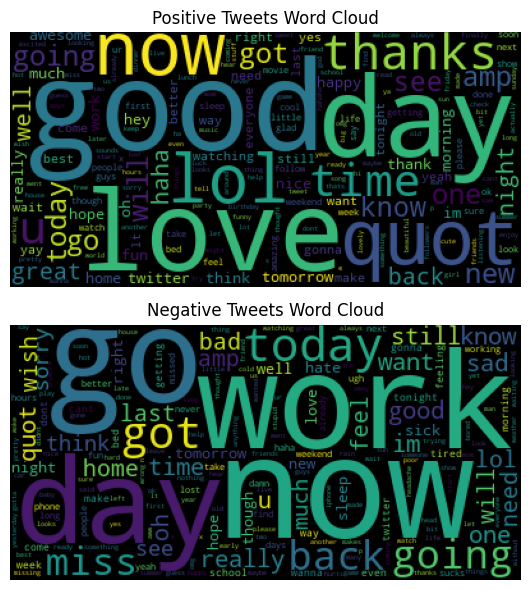

In [55]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud


wc = WordCloud()

_, axs = plt.subplots(2, 1, figsize=(12, 6))

axs[0].imshow(wc.generate_from_frequencies(pos_freq))
axs[0].set_title('Positive Tweets Word Cloud')
axs[0].axis('off')

axs[1].imshow(wc.generate_from_frequencies(neg_freq))
axs[1].set_title('Negative Tweets Word Cloud')
axs[1].axis('off')

plt.tight_layout()

plt.show()

{'good': 6172, 'love': 4809, 'day': 4688, 'quot': 4530, 'now': 4073, 'lol': 3653, 'thanks': 3374, 'u': 3213, 'today': 3083, 'going': 3074, 'time': 2983, 'will': 2923, 'go': 2811, 'got': 2776, 'one': 2720, 'new': 2677, 'amp': 2601, 'know': 2562, 'great': 2544, 'see': 2523, 'back': 2330, 'night': 2278, 'well': 2265, 'haha': 2174, 'happy': 2006, 'morning': 2005, 'work': 1997, 'hope': 1972, 'think': 1941, 'twitter': 1933, 'im': 1922, 'fun': 1854, 'really': 1835, 'much': 1732, 'oh': 1711, 'thank': 1694, 'nice': 1673, 'home': 1596, 'awesome': 1482, 'tomorrow': 1463, 'watching': 1445, 'wait': 1417, 'still': 1413, 'hey': 1396, 'need': 1362, 'last': 1337, 'right': 1315, 'make': 1315, 'tonight': 1281, 'yeah': 1265, 'yes': 1264, 'come': 1241, 'way': 1232, 'better': 1223, 'want': 1222, 'lt': 1209, 'best': 1150, 'gonna': 1093, 'people': 1063, 'getting': 1035, 'cool': 1023, 'yay': 1012, 'weekend': 1003, 'everyone': 985, 'first': 974, 'week': 953, 'soon': 948, 'bed': 943, 'ok': 913, 'follow': 911, 'next': 911, 'though': 910, 'say': 906, 'sleep': 897, 'amazing': 887, 'sure': 880, 'done': 870, 'little': 870, 'let': 868, 'life': 857, 'feel': 854, 'always': 848, 'please': 846, 'show': 845, 'movie': 839, 'glad': 821, 'guys': 819, 'take': 813, 'look': 810, 'ready': 809, 'days': 803, 'song': 791, 'ur': 789, 'watch': 781, 'pretty': 776, 'birthday': 770, 'friends': 768, 'school': 768, 'long': 768, 'finally': 766, 'x': 760, 'made': 759, 'thing': 755, 'tweet': 733, 'us': 729, 'excited': 726, 'looking': 719, 'never': 712, 'hi': 701, 'ya': 694, 'maybe': 687, 'check': 682, 'wow': 660, 'something': 660, 'sounds': 651, 'welcome': 650, 'beautiful': 648, 'another': 647, 'girl': 640, 'even': 640, 'working': 630, 'keep': 629, 'man': 627, 'cute': 625, 'world': 621, 'house': 621, 'p': 611, 'friend': 606, 'try': 601, 'later': 600, 'music': 596, 'enjoy': 595, 'tell': 587, 'summer': 587, 'thats': 580, 'sweet': 580, 'sorry': 579, 'big': 574, 'funny': 574, 'things': 574, 'actually': 571, 'party': 570, 'sun': 558, 'coming': 556, 'wish': 556, 'already': 556, 'dont': 555, 'bad': 551, 'stuff': 550, 'old': 549, 'cant': 547, 'luck': 546, 'went': 544, 'miss': 544, 'listening': 539, 'help': 525, 'might': 522, 'bit': 519, 'free': 519, 'thought': 516, 's': 514, 'two': 513, 'hot': 510, 'read': 509, 'play': 507, 'god': 505, 'baby': 503, 'w': 503, 'saw': 502, 'game': 496, 'lot': 495, 'ha': 491, 'hahaha': 489, 'hours': 488, 'dinner': 488, 'followers': 487, 'live': 484, 'lunch': 479, 'start': 478, 'year': 476, 'n': 469, 'hear': 469, 'wanna': 465, 'find': 465, 'around': 464, 'looks': 462, 'lovely': 461, 'making': 461, 'forward': 456, 'early': 455, 'waiting': 454, 'give': 453, 'guess': 450, 'following': 449, 'trying': 448, 'yet': 447, 'omg': 446, 'said': 445, 'sunday': 443, 'many': 441}


{'love': 4543, 'quot': 4364, 'thank': 4345, 'lol': 3345, 'now': 3236, 'u': 2956, 'today': 2791, 'going': 2789, 'good': 2735, 'day': 2527, 'one': 2443, 'will': 2403, 'amp': 2344, 'time': 2341, 'know': 2280, 'see': 2219, 'got': 2143, 'work': 2102, 'go': 2034, 'think': 1980, 'haha': 1923, 'well': 1912, 'back': 1724, 'great': 1706, 'new': 1691, 'hope': 1682, 'twitter': 1666, 'nice': 1495, 'make': 1480, 'fun': 1471, 'awesome': 1448, 'need': 1442, 'im': 1364, 'happy': 1303, 'want': 1302, 'still': 1284, 'really': 1273, 'watching': 1264, 'look': 1236, 'tomorrow': 1225, 'much': 1208, 'hey': 1198, 'oh': 1183, 'way': 1170, 'friend': 1124, 'come': 1081, 'tonight': 1064, 'ye': 1050, 'people': 1032, 'thing': 1019, 'yeah': 1009, 'say': 999, 'lt': 996, 'wait': 996, 'yay': 978, 'night': 947, 'tweet': 927, 'guy': 921, 'home': 909, 'cool': 907, 'show': 888, 'morning': 878, 'best': 870, 'ok': 858, 'let': 839, 'good morning': 835, 'life': 830, 'sleep': 830, 'amazing': 824, 'week': 810, 'bed': 809, 'feel': 805, 'though': 805, 'girl': 800, 'follow': 790, 'soon': 788, 'song': 787, 'made': 786, 'glad': 779, 'better': 759, 'lot': 754, 'ur': 748, 'right': 744, 'alway': 740, 'take': 739, 'x': 718, 'watch': 705, 'weekend': 704, 'sure': 695, 'maybe': 693, 'everyone': 687, 'first': 685, 'getting': 682, 'gonna': 681, 'little': 676, 'movie': 661, 'wow': 646, 'something': 639, 'excited': 637, 'p': 635, 'hi': 629, 'sound': 627, 'enjoy': 622, 'finally': 613, 'check': 607, 'done': 606, 'keep': 603, 'hour': 597, 'welcome': 594, 'start': 590, 'house': 585, 'thought': 580, 'school': 578, 'wish': 565, 'please': 556, 'music': 555, 'man': 550, 'later': 547, 'even': 541, 'mean': 539, 'actually': 535, 'miss': 534, 'working': 526, 'sorry': 526, 'try': 524, 'already': 521, 'follower': 521, 'read': 516, 'saw': 515, 'game': 515, 'live': 515, 'long': 514, 'pic': 511, 'w': 509, 'help': 508, 'last night': 508, 'ready': 497, 'hahaha': 496, 'cute': 495, 'summer': 493, 'find': 493, 'listening': 491, 'funny': 488, 'might': 488, 'bit': 486, 'bad': 485, 'play': 484, 'sweet': 483, 'mom': 482, 'never': 473, 'tell': 472, 'big': 469, 'went': 466, 'stuff': 464, 'sun': 462, 'year': 461, 'yet': 460, 'world': 456, 'baby': 453, 'video': 449, 'picture': 449, 'give': 448, 'party': 447, 'ya': 444, 'right now': 444, 'last': 441, 'guess': 440, 'free': 437, 'call': 436, 'making': 435, 'coffee': 433, 'may': 432, 'use': 431, 'okay': 431, 'another': 430, 'omg': 430, 'pretty': 429, 'around': 429, 'someone': 427, 'next': 426, 'coming': 425, 'hear': 425, 'early': 424, 'two': 422, 'n': 418, 'boy': 418, 'beautiful': 417, 's': 416, 'lunch': 412, 'waiting': 411, 'dinner': 411, 'book': 410, 'yesterday': 404, 'following': 400, 'hot': 394, 'talk': 394, 'hehe': 394, 'trying': 392, 'win': 390, 'd': 389}


In [61]:
counter = Counter()

In [72]:
counter.update({'a':1, 'b':2, 'c':4})
counter

Counter({'c': 40, 'b': 20, 'a': 10})